In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from matplotlib.collections import PolyCollection

In [4]:
n = 10 
x = []
y = []
for i in range(n):
    for j in range(i):
        x.append(j-i/2)
        y.append(-np.sqrt(3)/2*i)

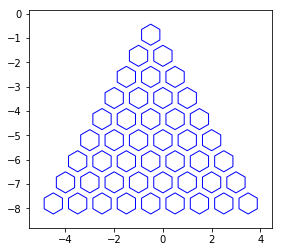

In [20]:
# Somewhat slow, but this still rendered in about 20s on my laptop. But I have a lot of memory.

fig,ax=plt.subplots()

for p in zip(x,y):
    hex = pch.RegularPolygon(p, 6, radius=np.sqrt(3)/4, orientation=0,facecolor="w",edgecolor="b")
    ax.add_artist(hex)
    
ax.set_xlim(min(x)-1,max(x)+1)
ax.set_ylim(min(y)-1,max(y)+1)
ax.set_aspect(1)

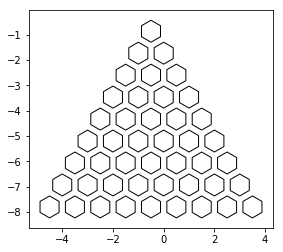

In [19]:
# This one is much faster and uses this stackoverflow answer 
#
#  https://stackoverflow.com/questions/37573314/matplotlib-efficient-way-to-create-large-number-of-patch-objects

def pascal_nums(n):
    '''Assumes n > 0 is an integer indicating the desired number of rows of Pascal's triangle 
    Returns a list of the expansion coefficients
    '''
    text = [] #base case
    for i in range(1,n+1): #Number of rows
        block = []
        for j in range(i): #Number of hexagons in row i
            if j == 0 or j == i-1: #The edges of Pascal's triangle
                block.append(1)
            elif i > 2: #All other points in row i of Pascal's triangle
                block.append(text[i-2][j] + text[i-2][j-1])                
        text.append(block)
        
        def unpack_elements(L):
            '''Assumes each element of L a the list containing the coefficients of a given row of Pascal's triangle.
            Returns a list with all the coefficients unpacked.
            '''
            elements = []
            for i in L:
                elements += [*i]
            return elements
        
    return pascal_elements(text)
    
r = np.sqrt(3)/4
hexa = np.array([[r*np.cos(a), r*np.sin(a)] for a in np.arange(np.pi/6,2*np.pi,np.pi/3)])
hexas = np.array([p + hexa for p in zip(x,y)])
'''ADD LABELS'''

fig, ax = plt.subplots()
coll = PolyCollection(hexas,facecolor="w",edgecolor="k")
ax.add_collection(coll)
ax.autoscale()
ax.set_aspect(1)
plt.show()

In [9]:
[1 if (j == 0 or j == i-1) else  for i in range(1,4) for j in range(i)]

[(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2)]